# **Installing Ultralytics Library**

Ultralytics website: https://www.ultralytics.com

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.5/877.5 kB 7.0 MB/s eta 0:00:00


# **Import Ultralytics**

In [2]:
import ultralytics
ultralytics.checks()  # Check the environment setup and dependencies required for running the YOLO

Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


# **Import YOLO**

In [3]:
from ultralytics import YOLO
from IPython.display import Image  # Import Image to show the results as images

# **Fetching The Dataset From Roboflow**

This is our dataset on Roboflow: https://app.roboflow.com/customization-zusov/vehicle-and-pedestrian-cuisv

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="09Mfg2Q6QbCYyAYr48r8")
project = rf.workspace("customization-zusov").project("vehicle-and-pedestrian-cuisv")
version = project.version(2)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Vehicle-and-Pedestrian-2 in yolov11:: 100%|██████████| 11050/11050 [00:02<00:00, 4189.95it/s]


In [5]:
dataset.location  # Check the dataset location

'/content/Vehicle-and-Pedestrian-2'

# **Train The Model**

In [6]:
model = YOLO("yolo11n.pt")    # Load a COCO-pretrained YOLO11n model

# Train the model on the COCO8 example dataset for 150 epochs
results = model.train(
    data="/content/Vehicle-and-Pedestrian-2/data.yaml",
    epochs=150,
    imgsz=640,
    patience=10  # Stops training if no improvement in 10 epochs
)

100%|██████████| 5.35M/5.35M [00:00<00:00, 287MB/s]

Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Vehicle-and-Pedestrian-2/data.yaml, epochs=150, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize

100%|██████████| 755k/755k [00:00<00:00, 100MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /content/Vehicle-and-Pedestrian-2/train/labels... 3750 images, 21 backgrounds, 0 corrupt: 100%|██████████| 3750/3750 [00:02<00:00, 1824.67it/s]

train: WARNING ⚠️ /content/Vehicle-and-Pedestrian-2/train/images/weligama-sri-lanka-march-7-260nw-191454845_jpg.rf.d0b0d7a76affff61a69572d1f6de96bd.jpg: 1 duplicate labels removed


train: New cache created: /content/Vehicle-and-Pedestrian-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.20 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Vehicle-and-Pedestrian-2/valid/labels... 1092 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1092/1092 [00:01<00:00, 895.02it/s]


val: New cache created: /content/Vehicle-and-Pedestrian-2/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.49G      1.133      1.863       1.27         18        640: 100%|██████████| 235/235 [01:28<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:13<00:00,  2.66it/s]


                   all       1092       3290      0.553      0.478      0.476      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      2.46G       1.28      1.546       1.39         19        640: 100%|██████████| 235/235 [01:23<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:13<00:00,  2.67it/s]


                   all       1092       3290      0.435      0.318      0.269      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      2.46G      1.287      1.432      1.408         18        640: 100%|██████████| 235/235 [01:20<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.82it/s]


                   all       1092       3290      0.634      0.565      0.611      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      2.44G      1.279      1.367      1.411         29        640: 100%|██████████| 235/235 [01:24<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.05it/s]


                   all       1092       3290      0.651      0.588      0.632      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      2.46G      1.262      1.318      1.393         15        640: 100%|██████████| 235/235 [01:22<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.27it/s]


                   all       1092       3290      0.672      0.585      0.629      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      2.46G      1.222      1.254      1.361         36        640: 100%|██████████| 235/235 [01:24<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.71it/s]


                   all       1092       3290       0.68       0.58      0.661      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150       2.4G      1.199      1.203      1.344         22        640: 100%|██████████| 235/235 [01:26<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.15it/s]


                   all       1092       3290      0.656      0.637      0.655      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      2.46G      1.174      1.171      1.328         23        640: 100%|██████████| 235/235 [01:19<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.03it/s]


                   all       1092       3290      0.647      0.615       0.64      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      2.46G      1.151      1.114      1.315         32        640: 100%|██████████| 235/235 [01:20<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  2.96it/s]


                   all       1092       3290      0.725       0.69      0.741      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      2.41G      1.136      1.094        1.3         18        640: 100%|██████████| 235/235 [01:23<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.84it/s]


                   all       1092       3290      0.745      0.653      0.734      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      2.46G      1.119      1.084      1.292         36        640: 100%|██████████| 235/235 [01:20<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  2.94it/s]


                   all       1092       3290      0.731      0.728      0.768      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      2.43G      1.113      1.063      1.286         21        640: 100%|██████████| 235/235 [01:21<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.83it/s]

                   all       1092       3290      0.714      0.678      0.728      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      2.46G      1.105      1.052      1.283         25        640: 100%|██████████| 235/235 [01:22<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.22it/s]

                   all       1092       3290      0.737      0.711      0.746      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      2.46G      1.079      1.021      1.265         25        640: 100%|██████████| 235/235 [01:21<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.82it/s]

                   all       1092       3290      0.767      0.739      0.793      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      2.45G      1.068     0.9951      1.257         17        640: 100%|██████████| 235/235 [01:25<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.74it/s]

                   all       1092       3290      0.737      0.723      0.766      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150       2.4G       1.06     0.9705      1.251         20        640: 100%|██████████| 235/235 [01:22<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.44it/s]


                   all       1092       3290      0.744      0.716      0.766      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150       2.4G      1.065     0.9831      1.252         24        640: 100%|██████████| 235/235 [01:21<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]

                   all       1092       3290      0.783      0.719      0.795       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      2.39G      1.046     0.9591      1.237         17        640: 100%|██████████| 235/235 [01:23<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.87it/s]

                   all       1092       3290      0.769      0.735      0.798      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      2.46G      1.054     0.9464      1.236         43        640: 100%|██████████| 235/235 [01:19<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.88it/s]

                   all       1092       3290      0.773       0.73      0.788      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      2.45G      1.022     0.9297       1.22         36        640: 100%|██████████| 235/235 [01:21<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.88it/s]

                   all       1092       3290      0.769      0.737      0.792      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      2.39G      1.024       0.93      1.224         19        640: 100%|██████████| 235/235 [01:26<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.80it/s]


                   all       1092       3290      0.774       0.76      0.809      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      2.53G      1.023     0.9279      1.226         28        640: 100%|██████████| 235/235 [01:21<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.12it/s]

                   all       1092       3290      0.783      0.736        0.8       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      2.45G      1.018     0.9198      1.222         21        640: 100%|██████████| 235/235 [01:20<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.82it/s]

                   all       1092       3290      0.759      0.745        0.8      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      2.46G      1.018     0.9071      1.219         19        640: 100%|██████████| 235/235 [01:21<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.35it/s]

                   all       1092       3290      0.769      0.728      0.779      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      2.45G      1.003     0.8954      1.212         21        640: 100%|██████████| 235/235 [01:19<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.07it/s]


                   all       1092       3290      0.792      0.764       0.82      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150       2.4G     0.9987     0.8918      1.209         36        640: 100%|██████████| 235/235 [01:24<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.72it/s]

                   all       1092       3290       0.76       0.75      0.797       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      2.42G      1.007     0.8842      1.207         23        640: 100%|██████████| 235/235 [01:20<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.79it/s]


                   all       1092       3290       0.77       0.74      0.801      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      2.45G     0.9924     0.8832      1.196         33        640: 100%|██████████| 235/235 [01:21<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.81it/s]

                   all       1092       3290      0.802      0.746      0.816      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      2.45G     0.9804     0.8676      1.193         14        640: 100%|██████████| 235/235 [01:21<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.00it/s]

                   all       1092       3290      0.786      0.776      0.823      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      2.48G     0.9647     0.8567      1.187         29        640: 100%|██████████| 235/235 [01:22<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.33it/s]

                   all       1092       3290      0.806       0.76      0.825      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      2.47G     0.9717     0.8669      1.191         30        640: 100%|██████████| 235/235 [01:21<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.04it/s]


                   all       1092       3290      0.782      0.778      0.821      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      2.42G     0.9708     0.8587      1.185         22        640: 100%|██████████| 235/235 [01:21<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.12it/s]

                   all       1092       3290      0.788      0.765      0.824      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150       2.4G     0.9583     0.8444      1.183         15        640: 100%|██████████| 235/235 [01:22<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.57it/s]

                   all       1092       3290      0.781      0.767       0.82      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      2.46G     0.9764      0.845      1.191         40        640: 100%|██████████| 235/235 [01:21<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.63it/s]

                   all       1092       3290      0.791      0.784      0.826      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      2.39G     0.9525     0.8411      1.177         32        640: 100%|██████████| 235/235 [01:22<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.80it/s]


                   all       1092       3290      0.793      0.773      0.829      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      2.48G     0.9563     0.8239      1.175         33        640: 100%|██████████| 235/235 [01:21<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.52it/s]


                   all       1092       3290      0.783      0.771      0.828      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      2.39G     0.9539     0.8286      1.177         29        640: 100%|██████████| 235/235 [01:22<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.44it/s]

                   all       1092       3290      0.786      0.774      0.825      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      2.46G     0.9313     0.8123      1.166         26        640: 100%|██████████| 235/235 [01:21<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.25it/s]

                   all       1092       3290       0.81       0.77      0.836       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150       2.4G     0.9386     0.8053       1.16         61        640: 100%|██████████| 235/235 [01:20<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.87it/s]

                   all       1092       3290      0.806      0.791      0.836      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150       2.4G     0.9456     0.8114      1.169         38        640: 100%|██████████| 235/235 [01:19<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.81it/s]

                   all       1092       3290      0.819      0.782      0.839      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150       2.4G     0.9454     0.8136      1.167         48        640: 100%|██████████| 235/235 [01:19<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.81it/s]


                   all       1092       3290      0.811      0.769      0.836       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      2.53G     0.9538     0.8082       1.17         35        640: 100%|██████████| 235/235 [01:20<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  2.95it/s]

                   all       1092       3290      0.805      0.789      0.842      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      2.39G     0.9346     0.7944       1.16         14        640: 100%|██████████| 235/235 [01:22<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.13it/s]

                   all       1092       3290      0.812      0.777      0.837      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      2.37G     0.9336     0.7937      1.164         22        640: 100%|██████████| 235/235 [01:22<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.41it/s]

                   all       1092       3290      0.808      0.763      0.836      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150       2.4G     0.9434     0.8051      1.169         26        640: 100%|██████████| 235/235 [01:23<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.70it/s]

                   all       1092       3290      0.794       0.78      0.839      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      2.45G     0.9268     0.7841      1.149         28        640: 100%|██████████| 235/235 [01:22<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.89it/s]

                   all       1092       3290      0.802       0.79       0.84      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      2.42G     0.9245     0.7666      1.153         27        640: 100%|██████████| 235/235 [01:22<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.35it/s]

                   all       1092       3290      0.801      0.792      0.848      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150       2.4G     0.9245     0.7704      1.151         20        640: 100%|██████████| 235/235 [01:20<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  2.97it/s]

                   all       1092       3290       0.82      0.765      0.835      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150       2.4G     0.9089     0.7698      1.136         32        640: 100%|██████████| 235/235 [01:18<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.82it/s]

                   all       1092       3290      0.795      0.801      0.843      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150       2.4G     0.9142     0.7577      1.144         51        640: 100%|██████████| 235/235 [01:19<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.70it/s]

                   all       1092       3290      0.799      0.795       0.84      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      2.42G     0.9141     0.7713      1.143         32        640: 100%|██████████| 235/235 [01:19<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.71it/s]

                   all       1092       3290      0.811      0.778      0.843      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      2.53G     0.9138     0.7557      1.147         20        640: 100%|██████████| 235/235 [01:22<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  2.97it/s]

                   all       1092       3290      0.801      0.775      0.836      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      2.39G     0.9042     0.7615      1.144         40        640: 100%|██████████| 235/235 [01:23<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.22it/s]


                   all       1092       3290      0.805      0.802      0.853      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      2.45G     0.8931     0.7336      1.131         11        640: 100%|██████████| 235/235 [01:25<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.62it/s]


                   all       1092       3290      0.816      0.788      0.847      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      2.45G     0.9032     0.7456      1.144         46        640: 100%|██████████| 235/235 [01:23<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.36it/s]


                   all       1092       3290      0.817      0.795      0.854      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      2.43G     0.8853     0.7398       1.13         21        640: 100%|██████████| 235/235 [01:21<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.82it/s]

                   all       1092       3290      0.807      0.783      0.847      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150       2.4G     0.9011     0.7502      1.134         39        640: 100%|██████████| 235/235 [01:21<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.74it/s]

                   all       1092       3290      0.817      0.796      0.855      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      2.39G     0.8931     0.7451      1.132         28        640: 100%|██████████| 235/235 [01:20<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.89it/s]

                   all       1092       3290      0.817      0.796      0.854      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      2.45G     0.8825     0.7369      1.132         30        640: 100%|██████████| 235/235 [01:22<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.56it/s]

                   all       1092       3290      0.802      0.797      0.847      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      2.43G     0.8895     0.7262      1.133         27        640: 100%|██████████| 235/235 [01:24<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.55it/s]


                   all       1092       3290      0.801      0.809      0.855      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      2.43G     0.8848     0.7205      1.128         28        640: 100%|██████████| 235/235 [01:23<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.11it/s]


                   all       1092       3290      0.819      0.796      0.853      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      2.43G     0.8746     0.7188      1.122         16        640: 100%|██████████| 235/235 [01:22<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.82it/s]

                   all       1092       3290      0.824       0.78      0.856      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      2.39G     0.8779     0.7243      1.126         18        640: 100%|██████████| 235/235 [01:20<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.79it/s]

                   all       1092       3290       0.82      0.802      0.857      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      2.45G      0.874     0.7324      1.124         21        640: 100%|██████████| 235/235 [01:19<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.04it/s]

                   all       1092       3290      0.805      0.807      0.856      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      2.37G     0.8731     0.7119      1.127         27        640: 100%|██████████| 235/235 [01:22<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.24it/s]

                   all       1092       3290       0.81      0.802      0.857      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      2.45G     0.8639     0.7029      1.114         35        640: 100%|██████████| 235/235 [01:22<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  3.90it/s]

                   all       1092       3290      0.808      0.805      0.858      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      2.39G     0.8641     0.7041      1.118         25        640: 100%|██████████| 235/235 [01:22<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.69it/s]


                   all       1092       3290      0.803      0.803      0.846      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      2.43G     0.8603     0.6989      1.105         27        640: 100%|██████████| 235/235 [01:22<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.36it/s]

                   all       1092       3290      0.808       0.81      0.859      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      2.44G      0.874     0.7061      1.118         23        640: 100%|██████████| 235/235 [01:20<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.00it/s]

                   all       1092       3290      0.814       0.78      0.853      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150       2.4G     0.8473     0.6892      1.114         13        640: 100%|██████████| 235/235 [01:20<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  2.98it/s]


                   all       1092       3290      0.801      0.812      0.856      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      2.45G     0.8577      0.698      1.107         19        640: 100%|██████████| 235/235 [01:20<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.75it/s]

                   all       1092       3290      0.808      0.816      0.861      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      2.48G     0.8588     0.6941      1.112         24        640: 100%|██████████| 235/235 [01:20<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.03it/s]

                   all       1092       3290       0.83      0.795       0.86      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      2.39G     0.8626     0.6897      1.106         33        640: 100%|██████████| 235/235 [01:19<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.82it/s]

                   all       1092       3290      0.823        0.8      0.864      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      2.46G     0.8555     0.6896      1.113         19        640: 100%|██████████| 235/235 [01:21<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  2.93it/s]

                   all       1092       3290      0.826      0.813      0.869       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      2.39G     0.8475     0.6899      1.106         38        640: 100%|██████████| 235/235 [01:23<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.00it/s]

                   all       1092       3290       0.83      0.789      0.861      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      2.37G     0.8345     0.6812      1.099         36        640: 100%|██████████| 235/235 [01:24<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.77it/s]

                   all       1092       3290      0.825      0.805      0.865      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      2.42G     0.8389     0.6671      1.094         28        640: 100%|██████████| 235/235 [01:24<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.61it/s]


                   all       1092       3290      0.811      0.822      0.865      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      2.39G      0.848     0.6789      1.099         27        640: 100%|██████████| 235/235 [01:23<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.36it/s]


                   all       1092       3290      0.836      0.787      0.863      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      2.45G     0.8459     0.6815      1.097         22        640: 100%|██████████| 235/235 [01:20<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.04it/s]

                   all       1092       3290      0.813      0.824      0.865      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      2.47G     0.8298     0.6709      1.094         11        640: 100%|██████████| 235/235 [01:20<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.82it/s]


                   all       1092       3290      0.812       0.82      0.868      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      2.42G     0.8337     0.6599      1.089         39        640: 100%|██████████| 235/235 [01:19<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.81it/s]

                   all       1092       3290      0.826        0.8      0.866      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150       2.4G     0.8453     0.6669      1.094         49        640: 100%|██████████| 235/235 [01:20<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:12<00:00,  2.78it/s]

                   all       1092       3290      0.805      0.823      0.864      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      2.53G     0.8374     0.6684      1.095         48        640: 100%|██████████| 235/235 [01:21<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  3.10it/s]

                   all       1092       3290      0.811      0.815      0.866      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      2.45G     0.8247     0.6633      1.089         25        640: 100%|██████████| 235/235 [01:23<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.40it/s]

                   all       1092       3290      0.825      0.803      0.864      0.619
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 74, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



84 epochs completed in 2.207 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:15<00:00,  2.22it/s]


                   all       1092       3290      0.826      0.811      0.869       0.62
            Pedestrian        388       1209      0.825      0.805      0.858      0.529
               Vehicle        794       2081      0.827      0.817      0.879      0.712
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▄████▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁
lr/pg1,▁▅███▇▇▇▇▇▇▆▆▆▆▆▆▆▆▆▅▅▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃
lr/pg2,▁▅█████▇▇▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▃▂
metrics/mAP50(B),▃▁▅▅▆▇▇▇▇▇▇▇▇▇▇▇▇▇██████████████████████
metrics/mAP50-95(B),▁▃▄▄▄▅▅▆▆▆▆▆▇▆▇▇▇▇▇▇▇▇▇▇▇▇██████████████
metrics/precision(B),▃▁▅▅▅▅▅▇▆▆▆▇▇▇▇▇▇▇█▇▇███▇▇██████████████
metrics/recall(B),▃▁▄▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇███▇▇████▇█▇█████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,███▆▆▅▅▄▄▄▃▃▃▃▃▂▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▂▁▁▁▁▁


# **Model Visualizaton**

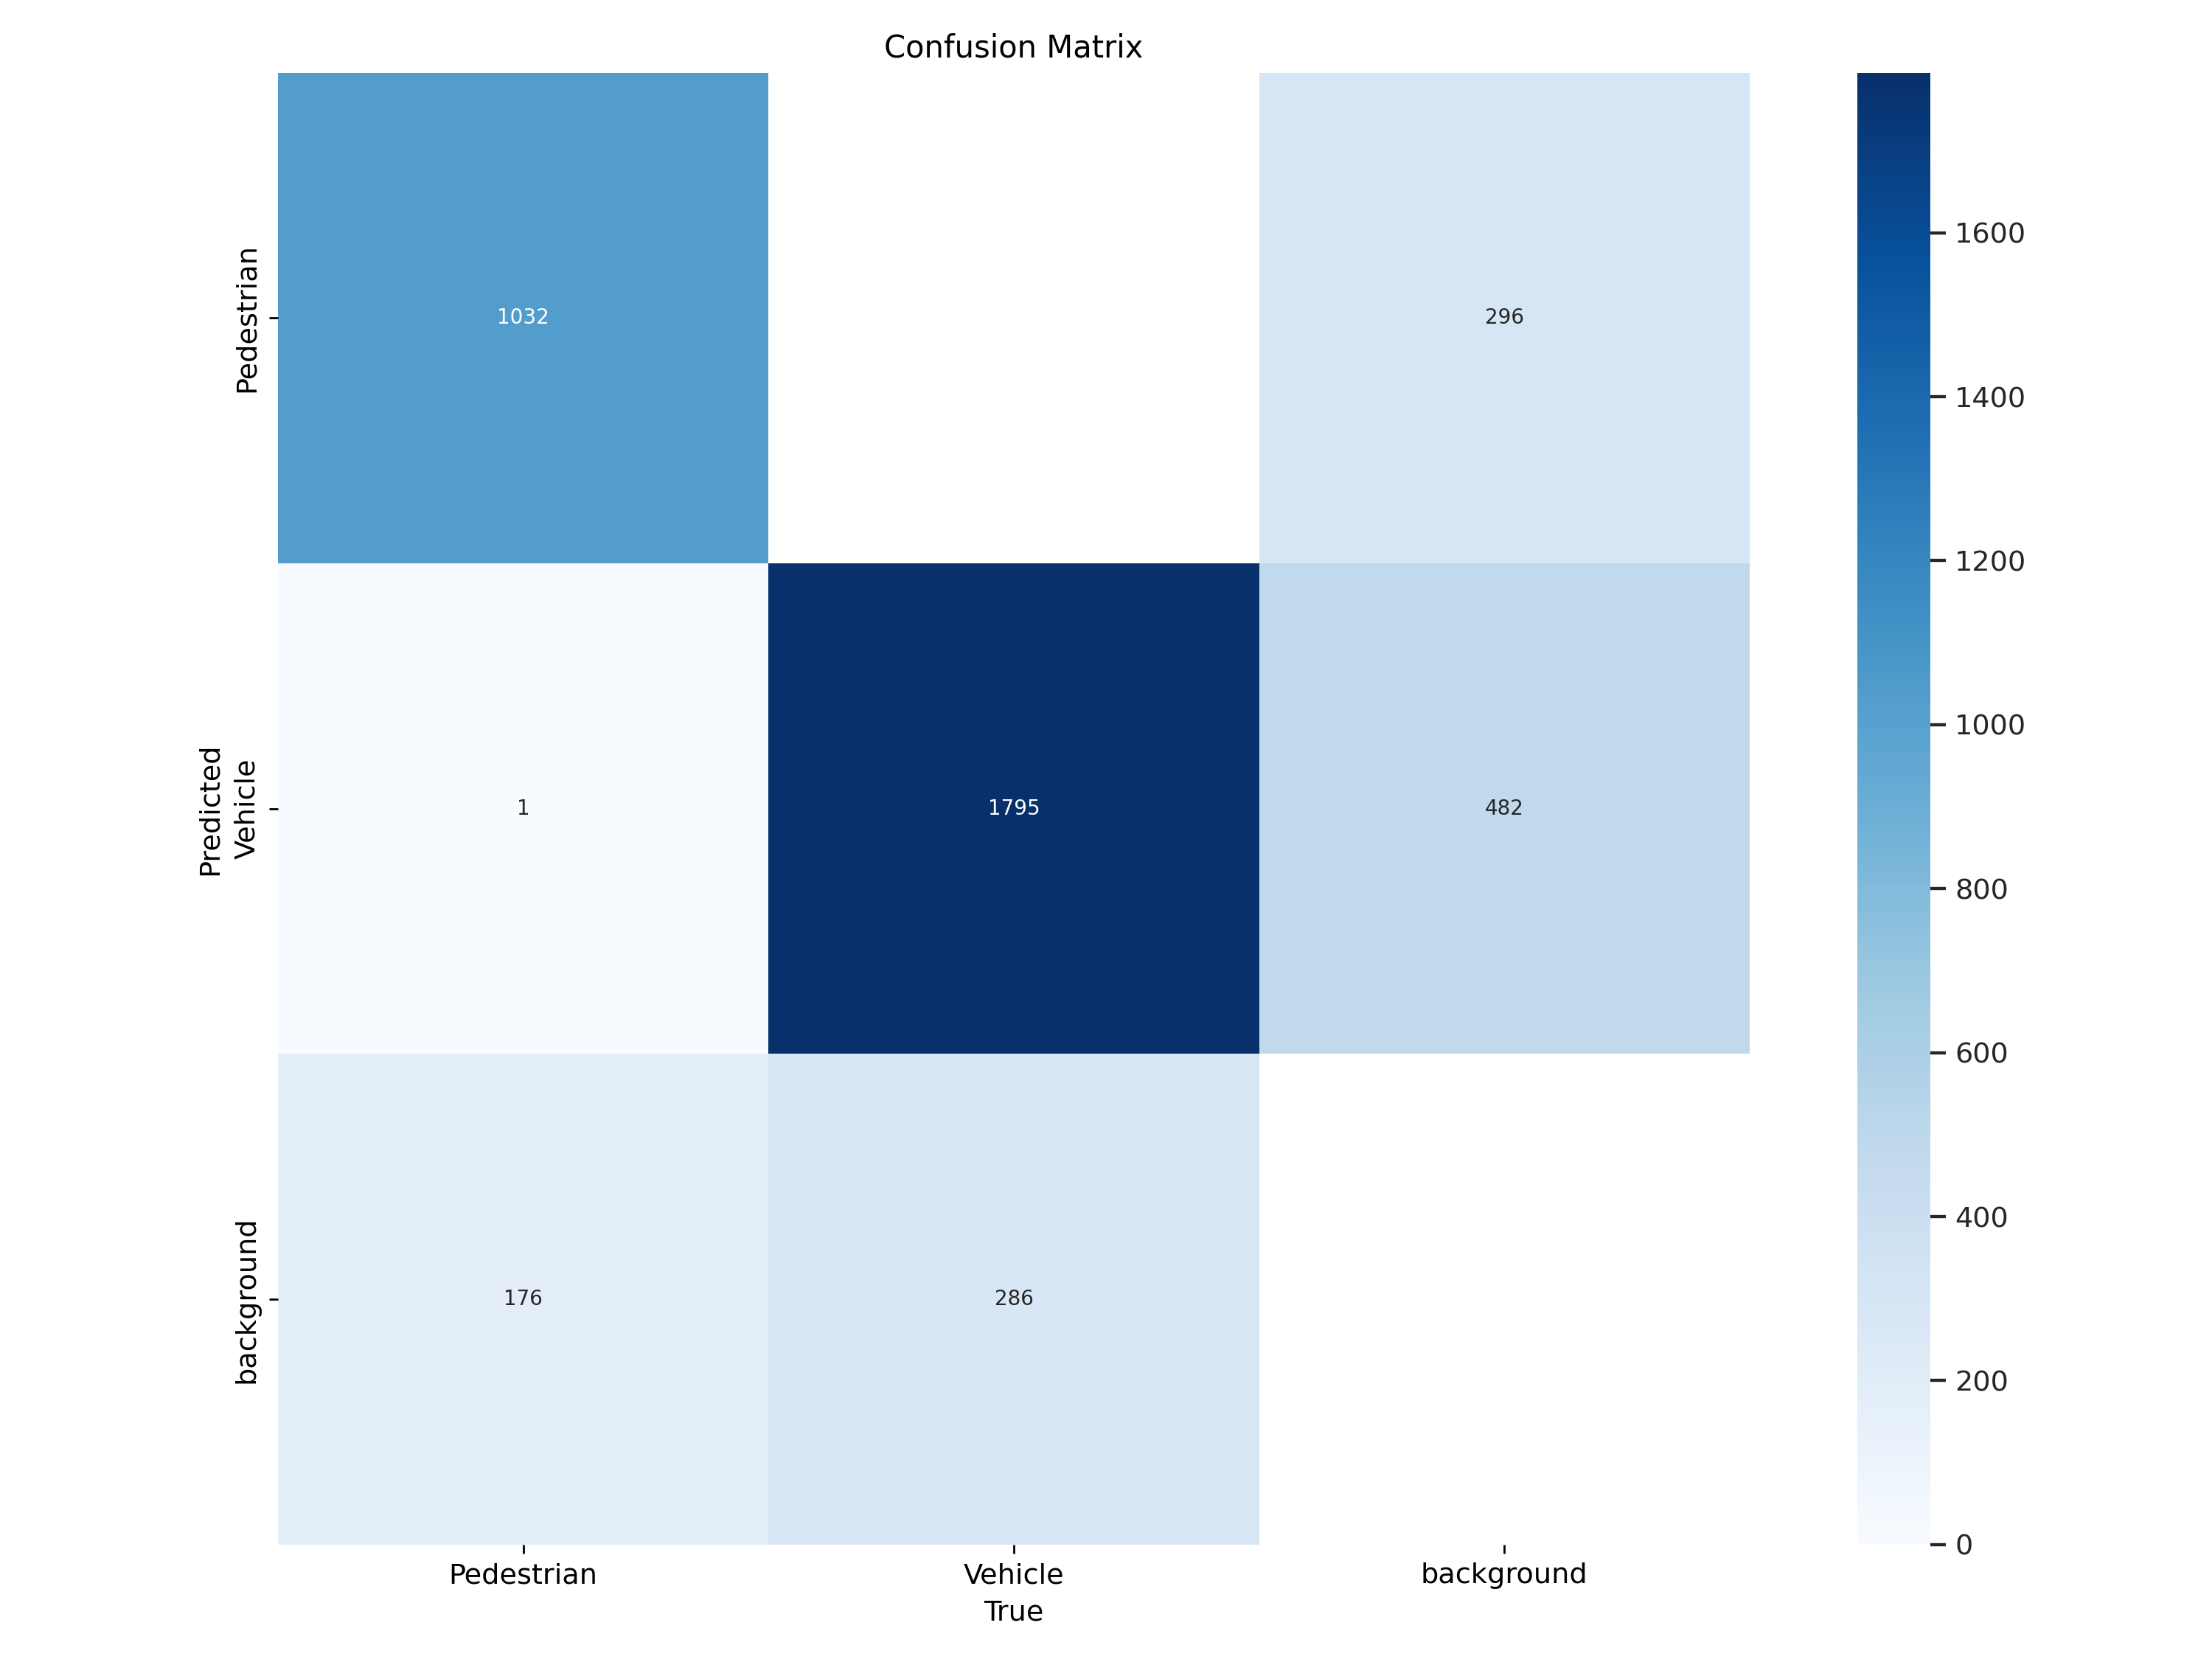

In [1]:
Image('/content/runs/detect/train/confusion_matrix.png', width=600)

**Key observations:**


*   Pedestrian Class:

    *   Correctly classified as Pedestrian: 1,032
    *   Misclassified as Vehicle: 296
    *   Misclassified as Background: 176
*   Vehicle Class:

    *   Misclassified as Pedestrian: 1
    *   Correctly classified as Vehicle: 1,795
    *   Misclassified as Background: 286
*   Background Class:

    *   Misclassified as Pedestrian: 0
    *   Misclassified as Vehicle: 482
    *   Correctly classified as Background: 0 (no correct predictions)

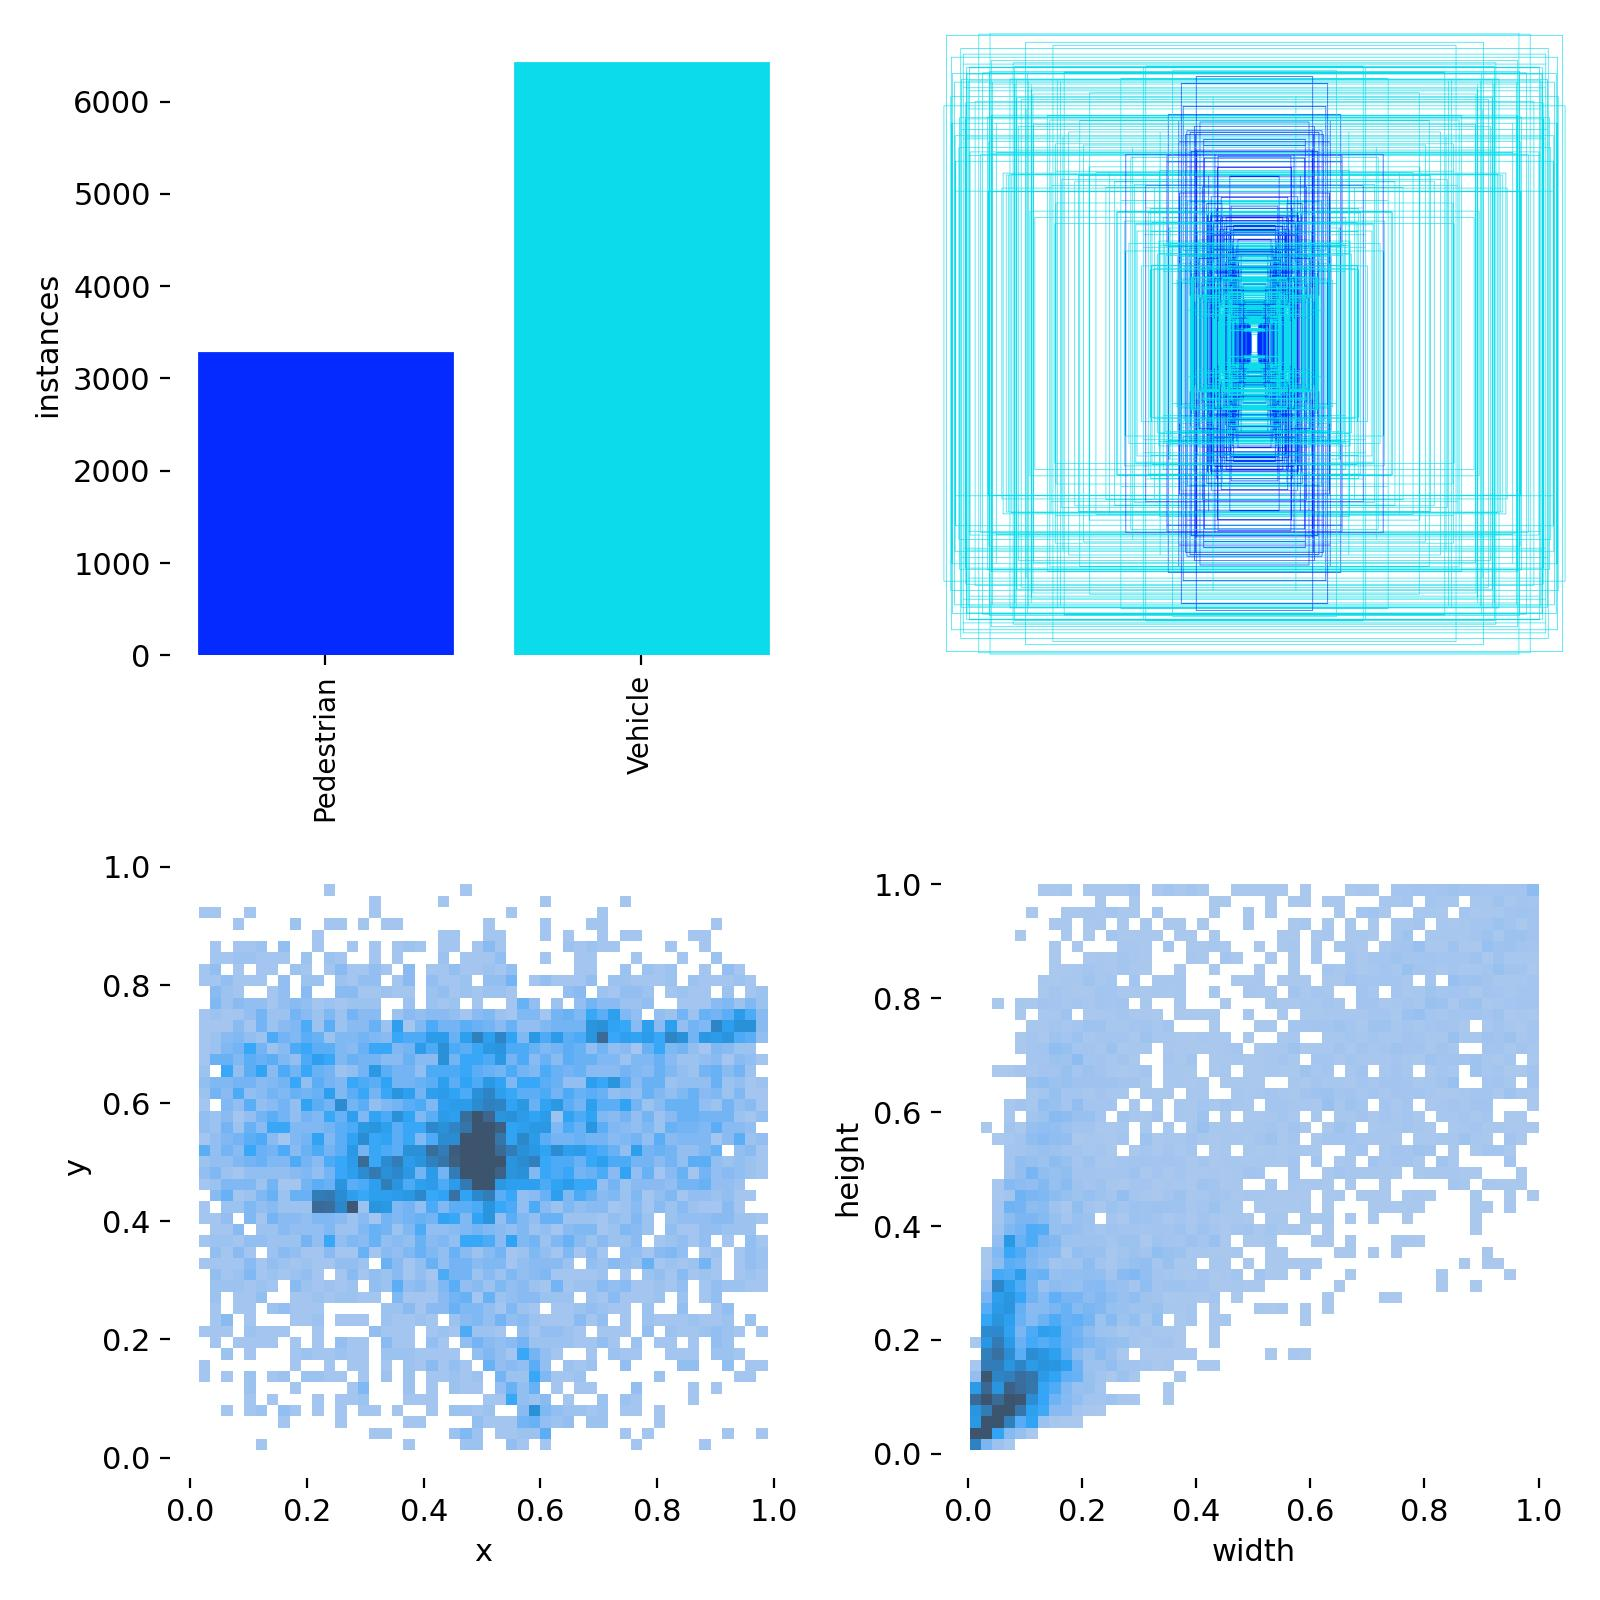

In [8]:
Image('/content/runs/detect/train/labels.jpg', width=600)

**Top left:** A bar chart comparing the number of instances for “Pedestrian” and “Vehicle” categories, with vehicles having more instances.

**Top right:** A bounding box visualization where multiple bounding boxes are concentrated toward the center.

**Bottom left:** A 2D scatter plot mapping object positions based on their x and y coordinates, showing a dense clustering in the middle.

**Bottom right:** A scatter plot of object dimensions (width and height), with most objects clustered toward smaller sizes.

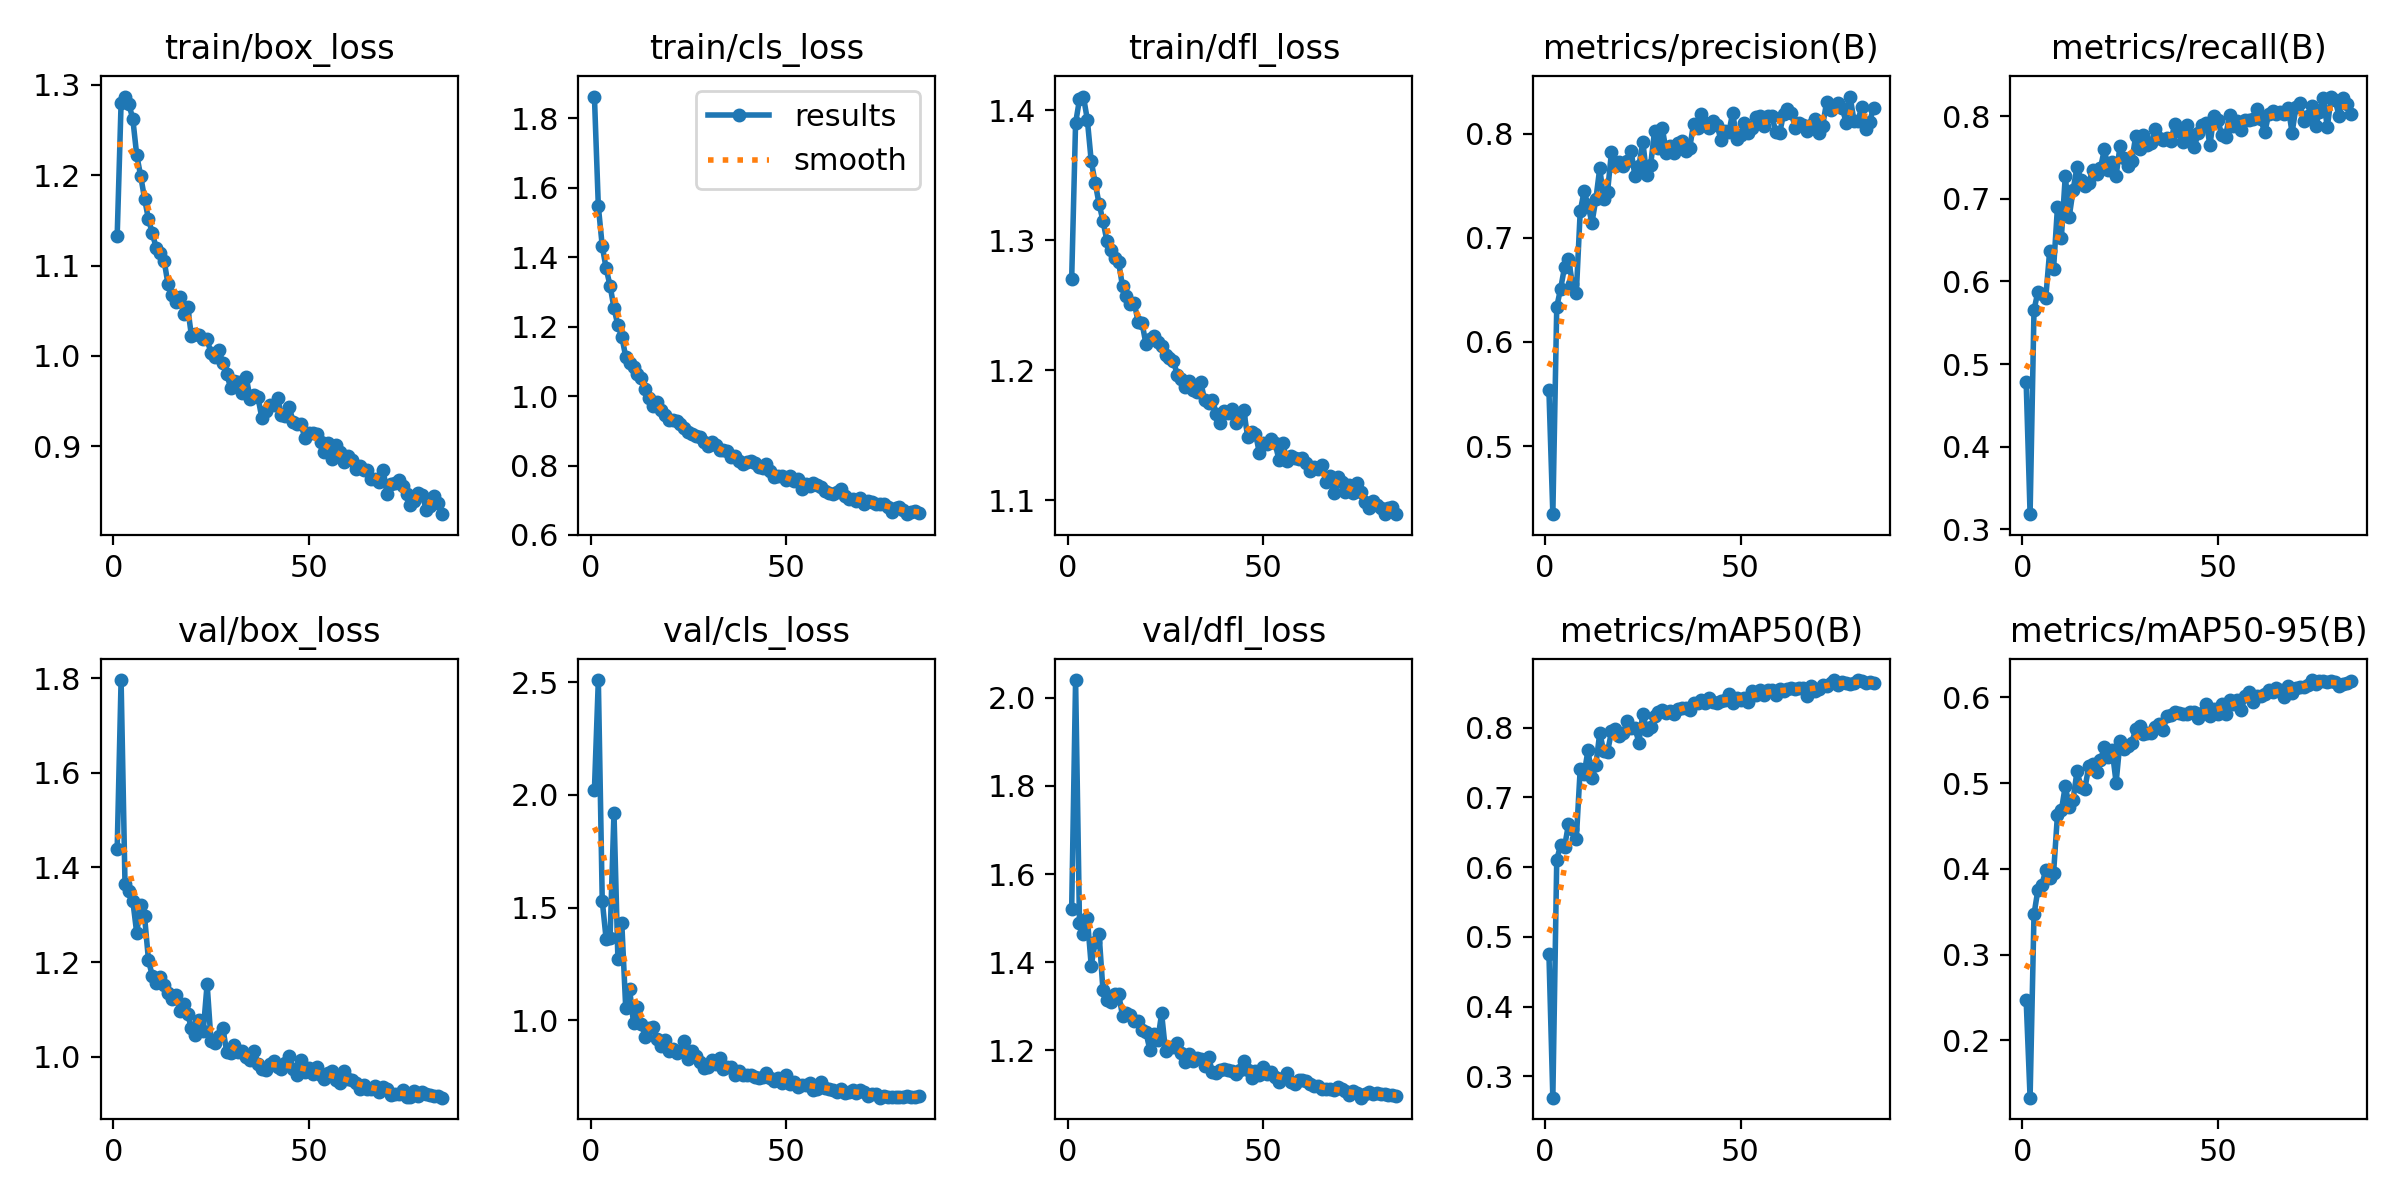

In [9]:
Image('/content/runs/detect/train/results.png', width=600)

*   **Top row:** Training metrics, including:
    *  Box loss, classification loss, distribution-focused loss (dfl loss), precision, and recall.

*   **Bottom row:** Validation metrics for the same categories, showing continuous improvement over the training process.

In [17]:
model = YOLO("/content/runs/detect/train/weights/best.pt")

results = model.val(data=f"{dataset.location}/data.yaml")    # Perform validation

Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/Vehicle-and-Pedestrian-2/valid/labels.cache... 1092 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1092/1092 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:17<00:00,  3.99it/s]


                   all       1092       3290      0.825      0.813      0.869      0.621
            Pedestrian        388       1209      0.826      0.807      0.858      0.531
               Vehicle        794       2081      0.825      0.819      0.879      0.711
Speed: 0.4ms preprocess, 4.5ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val2


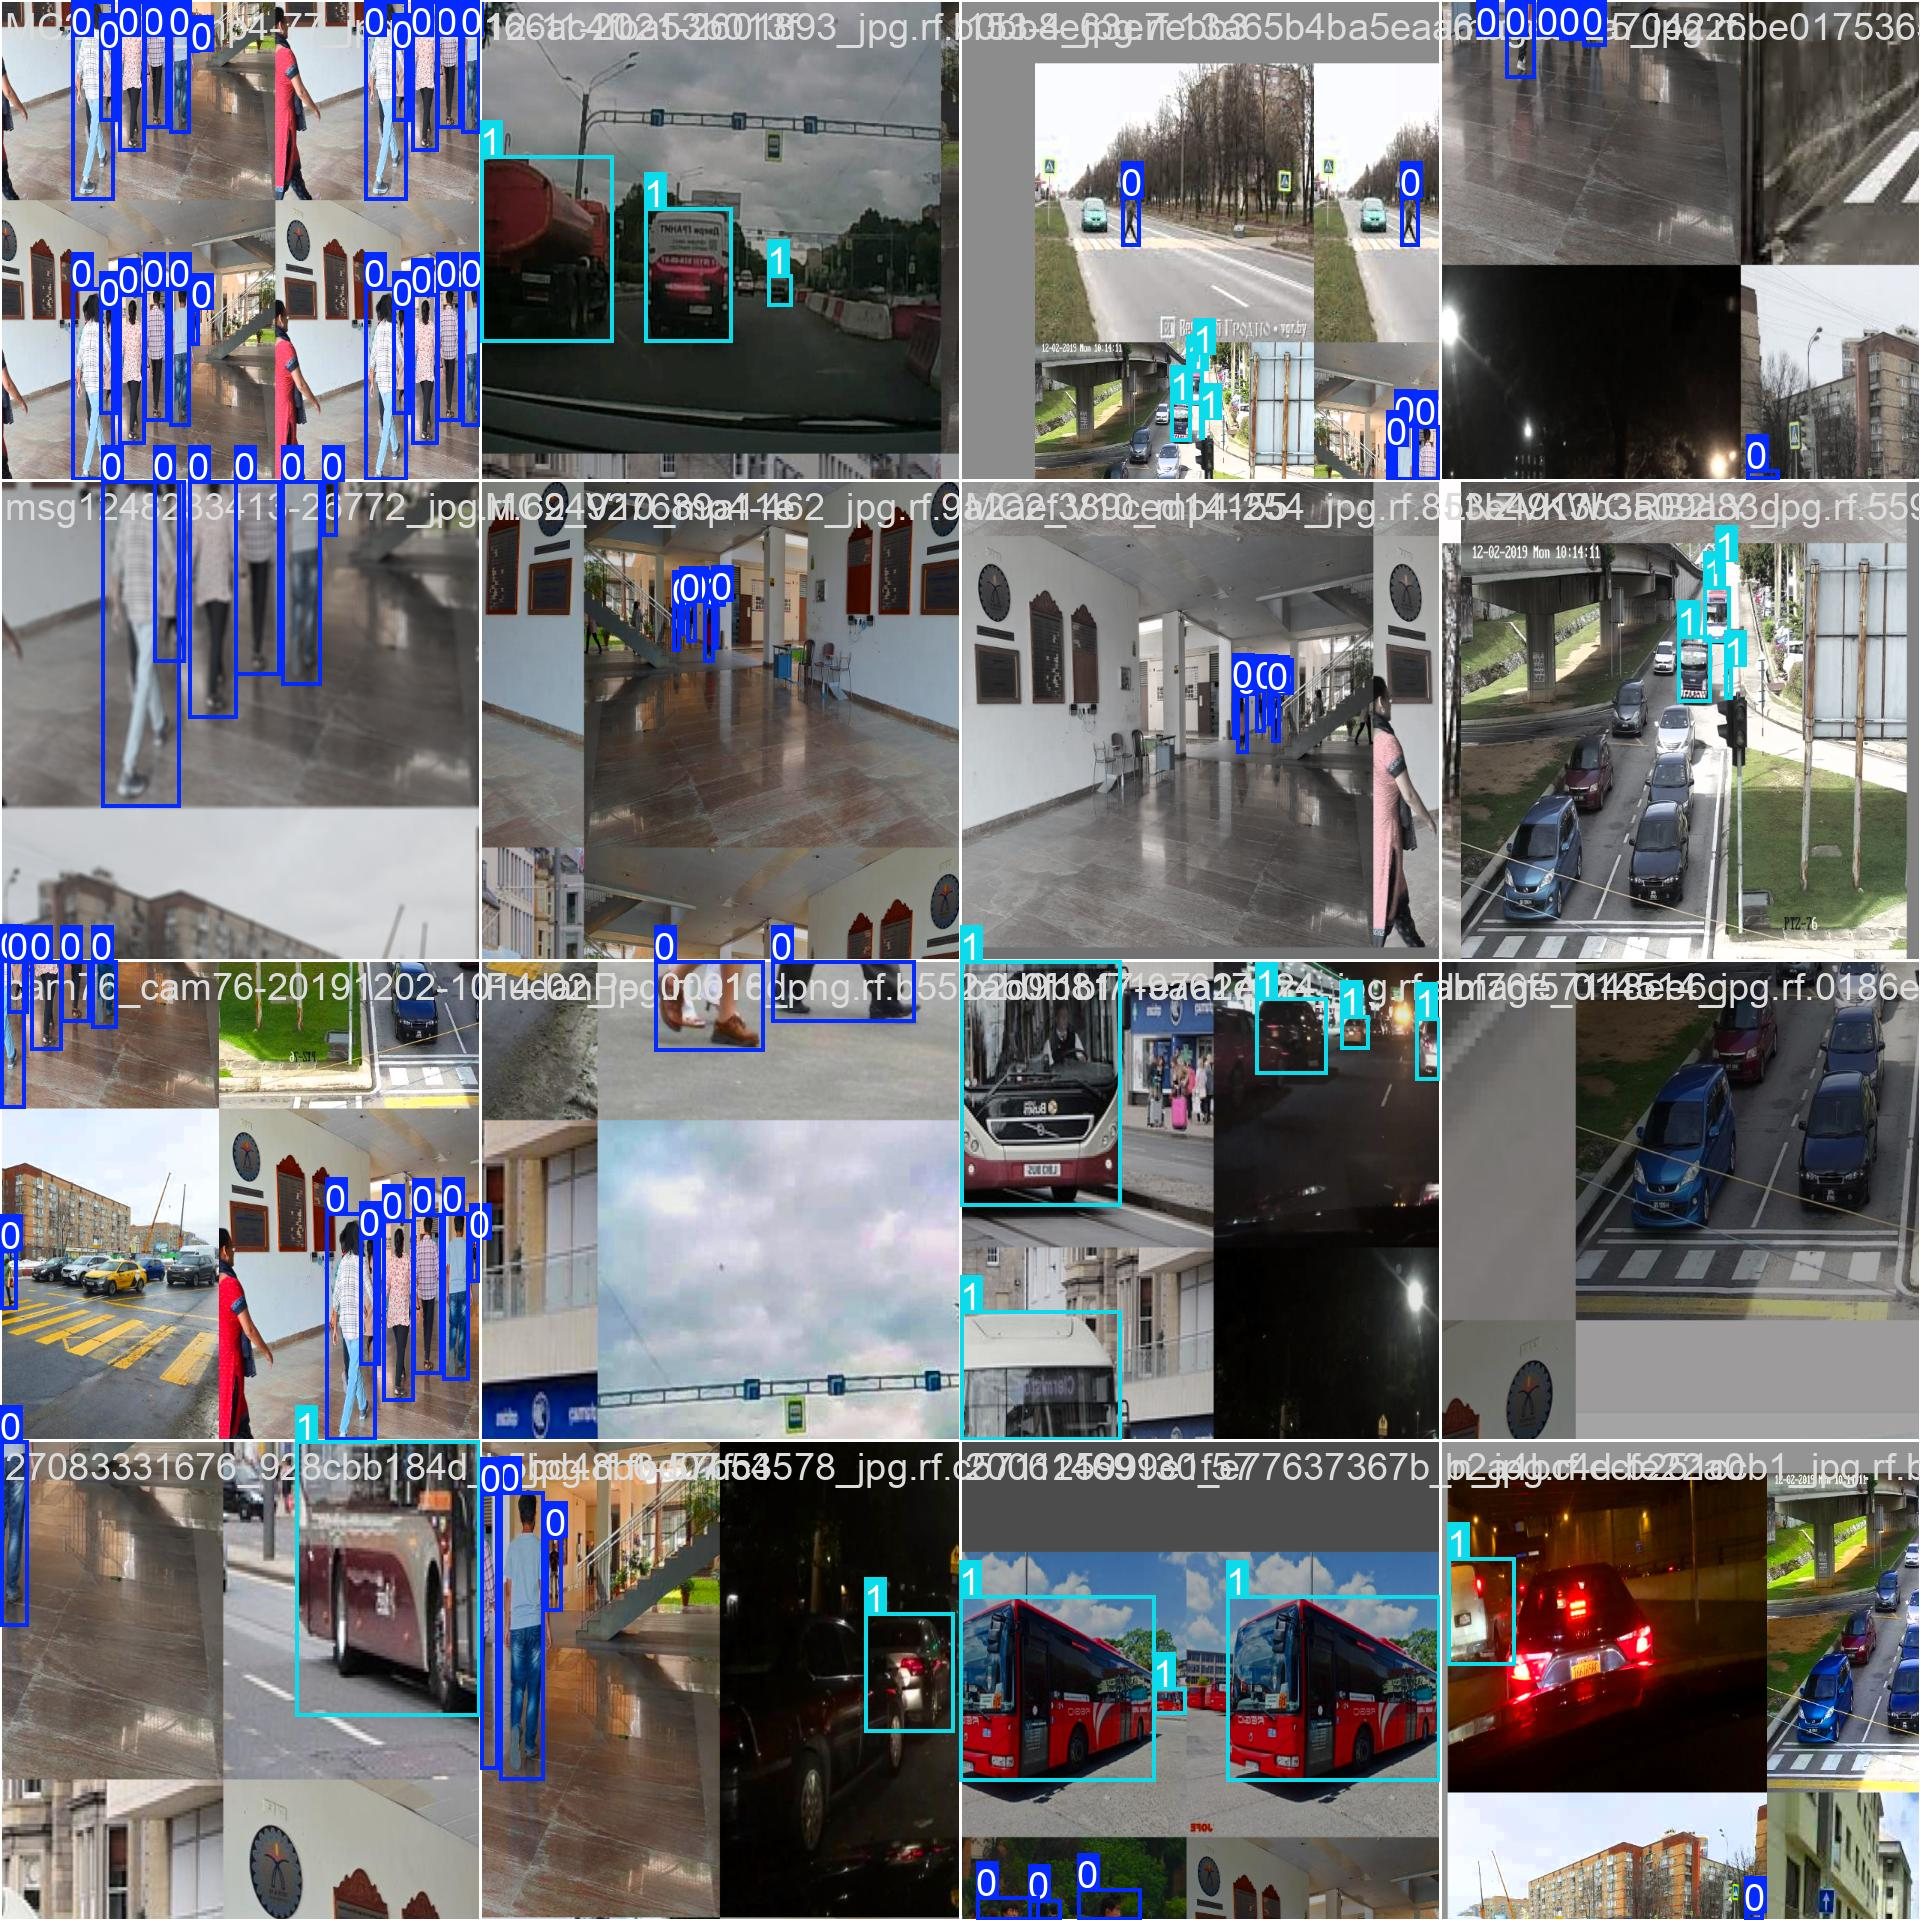

In [10]:
Image('/content/runs/detect/train/train_batch0.jpg', width=600)

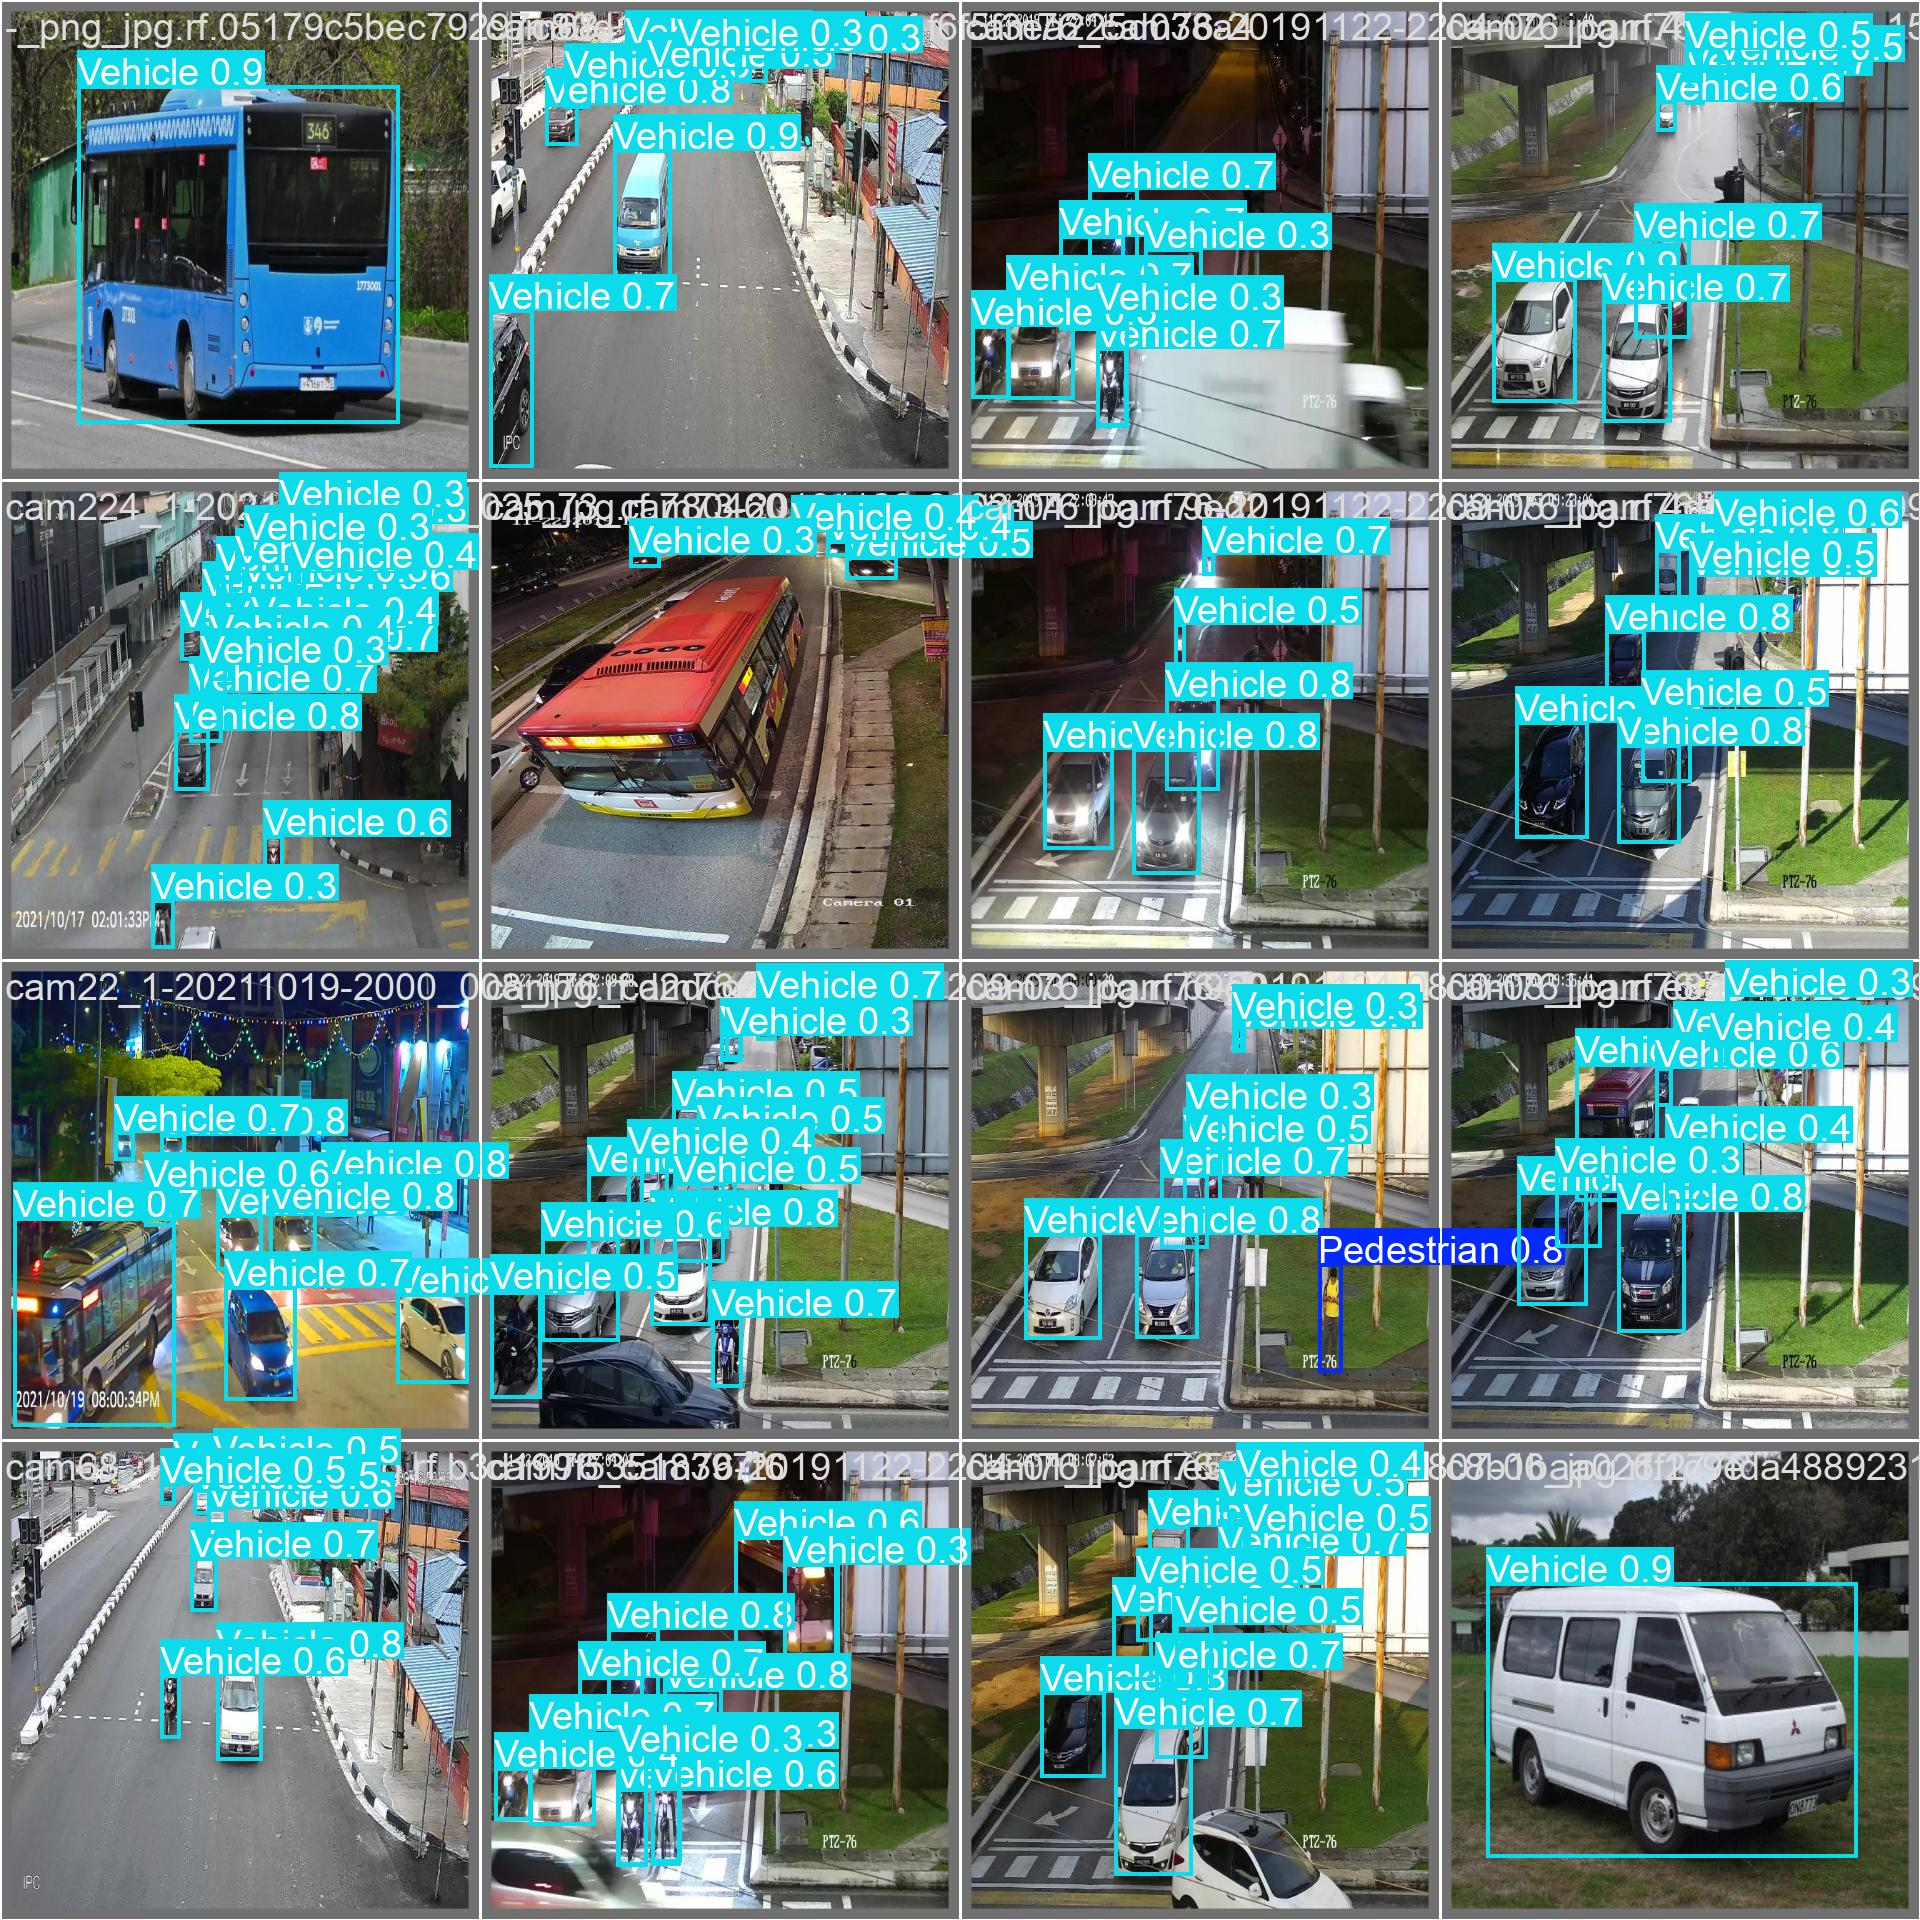

In [11]:
Image('/content/runs/detect/train/val_batch0_pred.jpg', width=600)